# Die Nernst-Planck Gleichung

Die Nernst-Planck-Gleichung beschreibt über Teilchenzahl- bzw. Massenerhaltung die Bewegung von Ionen in Flüssigkeiten unter Einfluss eines elektrischen Feldes.

Allgemein ergibt sich für ein externes elektrisches Feld der Form

$$ \mathbf{E} = \nabla \phi − \frac{\partial{\mathbf{A}}}{\partial{t}}$$
$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad(0.1)$$

aus der Kontinuitätsgleichung

$$\frac{\partial c}{\partial t} = - \nabla \cdot J$$
$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad(0.2)$$

mit

$$ J = - \left[D  \nabla c - u c + \frac{Dze}{k_\mathrm{B} T} c \left(\nabla \phi+\frac{\partial \mathbf A}{\partial t} \right) \right]$$
$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad(0.3)$$

die Nernst-Planck-Gleichung

$$\frac{\partial c}{\partial t} = \nabla \cdot \left[ D \nabla c - u c + \frac{Dze}{k_\mathrm{B} T} c \left(\nabla \phi+\frac{\partial \mathbf A}{\partial t} \right) \right] $$
$$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad(0.4)$$

Dabei sind $\mathbf{r}$ der Ort und $t$ die Zeit,<br />
$c = c(\mathbf{r}, t)$ die Ionenkonzentration mit dem entsprechenden Konzentrationsgradienten $\nabla c$,<br />
$u$ die Geschwindigkeit des Fluids,<br />
$D$ der Diffusionskoeffizient,<br />
$z$ die Wertigkeit der Ionenspezies,<br />
$e$ die Elementarladung,<br />
$k_\mathrm{B}$ die Boltzmannkonstante,<br />
$T$ die Temperatur,<br />
sowie $\phi$ das skalare und $\mathbf{A}$ das elektromagnetische Vektorpotential.

# Implementierung

In [1]:
import numpy as np
from scipy.integrate import odeint

## Parameter und Naturkonstanten

In [155]:
# Diffusionskonstante, Wertigkeit der Ionenspezies, Elementarladung, Boltzmann-Konstante, Temperatur
D = 10 #4.50*10**(-5) # Hydrogen in Water Source Wikipedia
z = 1
e = 1
k_B = 1
T = 1

## In dim = 1

### Funktionen

In [146]:
# Berechnung der Divergenz eines Vektorfeldes
def div(f):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of ndarrays, where every item of the list is one dimension of the vector field
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    num_dims = f.ndim
    return np.gradient(f)


def cdot(c, t):
    dcdt = div(D * np.gradient(c))
    return dcdt

In [151]:
# Dimension und Größe des Raums
size = 100
rsteps = 1000
r = np.linspace(0, size, rsteps)
scale = rsteps/size

# Initialisierung des Konzentrations-Arrays, Anfangskonzentration
c_0 = np.zeros(rsteps)
peak = int(42*scale)
c_0[peak-10:peak+10] = 1

# Zeitraum und Integrationsschritte
time = 10
tsteps = 300
t = np.linspace(0, time, tsteps)

In [152]:
solution = odeint(cdot, c_0, t, args=())

### Visualisierung

In [153]:
# Zum Animieren in diesem notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#### Raum-Konzentrations-Diagramm

<IPython.core.display.Javascript object>


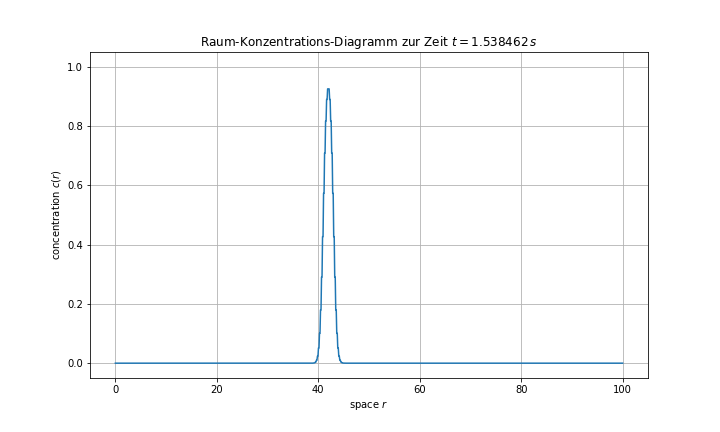

In [154]:
%matplotlib notebook
rc, rc_ax = plt.subplots(figsize=(10, 6))
conc, = rc_ax.plot(r, solution[0])
plt.title('Raum-Konzentrations-Diagramm zur Zeit $t = 0.000000s$')
plt.legend(loc='best')
plt.xlabel('space $r$')
plt.ylabel('concentration $c(r)$')
plt.grid()

def init():
    conc.set_ydata(np.ma.array(r, mask=True))
    return conc,
    
def animate(i):
    conc.set_ydata(solution[i])  # update the data
    plt.title('Raum-Konzentrations-Diagramm zur Zeit $t = ' + '{:f}'.format(t[i]) + '\,s$')
    return conc,

anim = FuncAnimation(rc, animate, init_func=init, frames=steps, interval=int(time/steps*1000), blit=True)

<IPython.core.display.Javascript object>


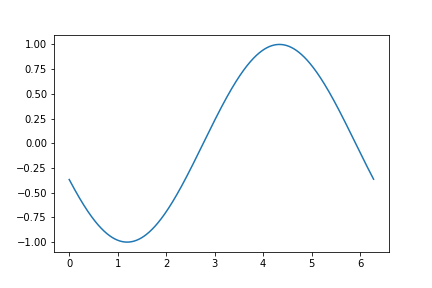

In [39]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation

"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

## In dim = 3

### Funktionen

In [10]:
# Berechnung der Divergenz eines Vektorfeldes
def div(f):
    """
    Computes the divergence of the vector field f, corresponding to dFx/dx + dFy/dy + ...
    :param f: List of ndarrays, where every item of the list is one dimension of the vector field
    :return: Single ndarray of the same shape as each of the items in f, which corresponds to a scalar field
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], axis=i) for i in range(num_dims)])


def cdot(c, t):
    dcdt = div(D * np.gradient(c))
    return dcdt

### Integration

#### Anfangsbedingungen und Genauigkeiten

In [11]:
# Dimension und Größe des Raums
length = [100]
dim = len(length)

# Initialisierung des Konzentrations-Arrays, Anfangskonzentration
#c_0 = np.empty([length[i] for i in range(dim)])
#c_0 = np.tile(np.arange(length[0]), 1)
c_0 = np.zeros(length)
c_0[42]=10

# Zeitraum und Integrationsschritte
time = 10
steps = 300

In [12]:
c_0

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

#### Lösung mit scipy.odeint

In [13]:
t = np.linspace(0, time, steps+1)
solution = odeint(cdot, c_0, t, args=())

AxisError: axis 0 is out of bounds for array of dimension 0

## Referenzen

[1] https://en.wikipedia.org/wiki/Nernst%E2%80%93Planck_equation (27. November 2017)<br />
[2] http://www.columbia.edu/cu/biology/courses/w3004/Nernstequationderiv.pdf (30. November 2017)<br />
[3] http://hpfem.org/wp-content/uploads/doc-web/doc-examples/src/hermes2d/examples/nernst-planck.html (30. November 2017)<br />
[4] http://www.sci.osaka-cu.ac.jp/~ohnita/2010/TCLin.pdf (12. Dezember 2017)<br />